In [1]:
import csv
import random
from shutil import copyfile
from pycocotools.coco import COCO
from tqdm import tqdm

In [3]:
#make directory and get annotations for training and testing
!mkdir data
!wget http://msvocds.blob.core.windows.net/annotations-1-0-3/captions_train-val2014.zip -P ./data/
!unzip ./data/captions_train-val2014.zip -d ./data/
!rm ./data/captions_train-val2014.zip

--2021-02-20 16:13:34--  http://msvocds.blob.core.windows.net/annotations-1-0-3/captions_train-val2014.zip
Resolving web.ucsd.edu (web.ucsd.edu)... 132.239.1.230, 132.239.1.231
Connecting to web.ucsd.edu (web.ucsd.edu)|132.239.1.230|:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: 19673183 (19M) [application/octet-stream Charset=UTF-8]
Saving to: ‘./data/captions_train-val2014.zip’

captions_train-val2 100%[===================>]  18.76M  --.-KB/s    in 0.05s   

2021-02-20 16:13:34 (348 MB/s) - ‘./data/captions_train-val2014.zip’ saved [19673183/19673183]

Archive:  ./data/captions_train-val2014.zip
  inflating: ./data/annotations/captions_train2014.json  
  inflating: ./data/annotations/captions_val2014.json  


In [4]:
!mkdir data/images
!mkdir data/images/train
!mkdir data/images/val
!mkdir data/images/test

In [5]:
coco = COCO('./data/annotations/captions_train2014.json')

loading annotations into memory...
Done (t=0.90s)
creating index...
index created!


In [6]:
#get ids of training images
with open('train_ids.csv', 'r') as f:
    reader = csv.reader(f)
    trainIds = list(reader)
    
trainIds = [int(i) for i in trainIds[0]]

with open('val_ids.csv', 'r') as f:
    reader = csv.reader(f)
    valIds = list(reader)
    
valIds = [int(i) for i in valIds[0]]

In [7]:
for img_id in trainIds:
    path = coco.loadImgs(img_id)[0]['file_name']
    copyfile('/datasets/COCO-2015/train2014/'+path, './data/images/train/'+path)
for img_id in valIds:
    path = coco.loadImgs(img_id)[0]['file_name']
    copyfile('/datasets/COCO-2015/train2014/'+path, './data/images/val/'+path)

In [8]:
cocoTest = COCO('./data/annotations/captions_val2014.json')

loading annotations into memory...
Done (t=0.66s)
creating index...
index created!


In [9]:
with open('test_ids.csv', 'r') as f:
    reader = csv.reader(f)
    testIds = list(reader)
    
testIds = [int(i) for i in testIds[0]]

In [10]:
for img_id in testIds:
    path = cocoTest.loadImgs(img_id)[0]['file_name']
    copyfile('/datasets/COCO-2015/val2014/'+path, './data/images/test/'+path)

In [11]:
print("done")

done


In [12]:
import dataset_factory as f
from file_utils import *
import nltk
nltk.download('punkt')


name = 'default'
config_data = read_file_in_dir('./', name + '.json')

coco_test, vocab, train_dataloader, val_dataloader, test_dataloader = f.get_datasets(config_data)

[nltk_data] Downloading package punkt to /home/juh079/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


loading annotations into memory...
Done (t=0.84s)
creating index...
index created!
loading annotations into memory...
Done (t=0.40s)
creating index...
index created!
loading annotations into memory...
Done (t=0.95s)
creating index...
index created!
[1000/414113] Tokenized the captions.
[2000/414113] Tokenized the captions.
[3000/414113] Tokenized the captions.
[4000/414113] Tokenized the captions.
[5000/414113] Tokenized the captions.
[6000/414113] Tokenized the captions.
[7000/414113] Tokenized the captions.
[8000/414113] Tokenized the captions.
[9000/414113] Tokenized the captions.
[10000/414113] Tokenized the captions.
[11000/414113] Tokenized the captions.
[12000/414113] Tokenized the captions.
[13000/414113] Tokenized the captions.
[14000/414113] Tokenized the captions.
[15000/414113] Tokenized the captions.
[16000/414113] Tokenized the captions.
[17000/414113] Tokenized the captions.
[18000/414113] Tokenized the captions.
[19000/414113] Tokenized the captions.
[20000/414113] Toke

[204000/414113] Tokenized the captions.
[205000/414113] Tokenized the captions.
[206000/414113] Tokenized the captions.
[207000/414113] Tokenized the captions.
[208000/414113] Tokenized the captions.
[209000/414113] Tokenized the captions.
[210000/414113] Tokenized the captions.
[211000/414113] Tokenized the captions.
[212000/414113] Tokenized the captions.
[213000/414113] Tokenized the captions.
[214000/414113] Tokenized the captions.
[215000/414113] Tokenized the captions.
[216000/414113] Tokenized the captions.
[217000/414113] Tokenized the captions.
[218000/414113] Tokenized the captions.
[219000/414113] Tokenized the captions.
[220000/414113] Tokenized the captions.
[221000/414113] Tokenized the captions.
[222000/414113] Tokenized the captions.
[223000/414113] Tokenized the captions.
[224000/414113] Tokenized the captions.
[225000/414113] Tokenized the captions.
[226000/414113] Tokenized the captions.
[227000/414113] Tokenized the captions.
[228000/414113] Tokenized the captions.


[410000/414113] Tokenized the captions.
[411000/414113] Tokenized the captions.
[412000/414113] Tokenized the captions.
[413000/414113] Tokenized the captions.
[414000/414113] Tokenized the captions.
Saved the vocab.
loading annotations into memory...
Done (t=0.75s)
creating index...
index created!
loading annotations into memory...
Done (t=0.81s)
creating index...
index created!
loading annotations into memory...
Done (t=0.83s)
creating index...
index created!


In [13]:
!python3 vocab.py

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


AxesImage(54,36;334.8x217.44)
loading annotations into memory...
Done (t=0.92s)
creating index...
index created!
[1000/414113] Tokenized the captions.
[2000/414113] Tokenized the captions.
[3000/414113] Tokenized the captions.
[4000/414113] Tokenized the captions.
[5000/414113] Tokenized the captions.
[6000/414113] Tokenized the captions.
[7000/414113] Tokenized the captions.
[8000/414113] Tokenized the captions.
[9000/414113] Tokenized the captions.
[10000/414113] Tokenized the captions.
[11000/414113] Tokenized the captions.
[12000/414113] Tokenized the captions.
[13000/414113] Tokenized the captions.
[14000/414113] Tokenized the captions.
[15000/414113] Tokenized the captions.
[16000/414113] Tokenized the captions.
[17000/414113] Tokenized the captions.
[18000/414113] Tokenized the captions.
[19000/414113] Tokenized the captions.
[20000/414113] Tokenized the captions.
[21000/414113] Tokenized the captions.
[22000/414113] Tokenized the captions.
[23000/414113] Tokenized the captions.

[206000/414113] Tokenized the captions.
[207000/414113] Tokenized the captions.
[208000/414113] Tokenized the captions.
[209000/414113] Tokenized the captions.
[210000/414113] Tokenized the captions.
[211000/414113] Tokenized the captions.
[212000/414113] Tokenized the captions.
[213000/414113] Tokenized the captions.
[214000/414113] Tokenized the captions.
[215000/414113] Tokenized the captions.
[216000/414113] Tokenized the captions.
[217000/414113] Tokenized the captions.
[218000/414113] Tokenized the captions.
[219000/414113] Tokenized the captions.
[220000/414113] Tokenized the captions.
[221000/414113] Tokenized the captions.
[222000/414113] Tokenized the captions.
[223000/414113] Tokenized the captions.
[224000/414113] Tokenized the captions.
[225000/414113] Tokenized the captions.
[226000/414113] Tokenized the captions.
[227000/414113] Tokenized the captions.
[228000/414113] Tokenized the captions.
[229000/414113] Tokenized the captions.
[230000/414113] Tokenized the captions.


[412000/414113] Tokenized the captions.
[413000/414113] Tokenized the captions.
[414000/414113] Tokenized the captions.
{'<pad>': 0, '<start>': 1, '<end>': 2, '<unk>': 3, 'a': 4, 'very': 5, 'clean': 6, 'and': 7, 'well': 8, 'decorated': 9, 'empty': 10, 'bathroom': 11, 'panoramic': 12, 'view': 13, 'of': 14, 'kitchen': 15, 'all': 16, 'its': 17, 'appliances': 18, '.': 19, 'blue': 20, 'white': 21, 'with': 22, 'butterfly': 23, 'themed': 24, 'wall': 25, 'tiles': 26, 'photo': 27, 'dining': 28, 'room': 29, 'graffiti-ed': 30, 'stop': 31, 'sign': 32, 'across': 33, 'the': 34, 'street': 35, 'from': 36, 'red': 37, 'car': 38, 'vandalized': 39, 'beetle': 40, 'on': 41, 'road': 42, 'border': 43, 'butterflies': 44, 'paint': 45, 'walls': 46, 'above': 47, 'it': 48, 'an': 49, 'angled': 50, 'beautifully': 51, 'two': 52, 'people': 53, 'are': 54, 'walking': 55, 'down': 56, 'beach': 57, 'sink': 58, 'toilet': 59, 'inside': 60, 'small': 61, 'black': 62, 'square': 63, 'tile': 64, 'floor': 65, 'that': 66, 'needs': 

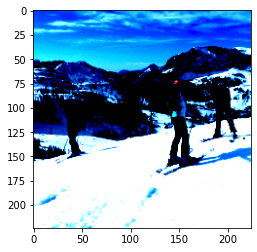

In [14]:
#print(type(train_dataloader))
import matplotlib.pyplot as plt

from vocab import *

print(plt.imshow(train_dataloader.dataset.__getitem__(0)[0].permute(1, 2, 0)))
#print(train_dataloader.dataset.__getitem__(0)[1])

captions = []
vocab = build_vocab("./data/annotations/captions_train2014.json", 2)
print(vocab.word2idx)
# for image, target, img_id in enumerate(train_dataloader):
#     captions.append(target)

In [15]:
words = vocab.word2idx
idx2w = vocab.idx2word

In [16]:
length = 0
for x in list(train_dataloader.dataset.__getitem__(0)[1].numpy()):
    length += 1
    print(idx2w[int(x)])
print(length)
length2 = 0
for x in list(train_dataloader.dataset.__getitem__(1)[1].numpy()):
    length2 += 1
    print(idx2w[int(x)])
print(length2)

<start>
a
couple
of
people
riding
on
top
of
a
snow
covered
ski
slope
.
<end>
16
<start>
a
couple
of
people
in
skis
are
standing
on
a
snowy
hill
<end>
14


In [17]:
print(len(vocab))

14462


In [18]:
max_length = -1
histo = set()
for itera, (image, captions, index) in enumerate(train_dataloader):
    print(index)
#     for caption in captions:
#         length = len(list(caption.numpy()))
#         histo.add(length)
#         max_length = max(length, max_length)
    
print(max_length)
print(histo)

ValueError: too many values to unpack (expected 3)